# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: domingoh 3 de Octubre, 2021 23:59
</div>

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets
import sympy
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-danger">
Código de regresión lineal de la clase:
</div>

In [2]:
#Codigo RL plagiado de clase :3

class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

<div class="alert alert-danger">
Sea, por lo visto en clase:
$$
\hat{\textbf{y}} = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$
Entoces, en el caso de 
    $\beta_0$ y $\beta_1$ (intersección $I$ y pendiente $p$)
$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{i=1}^{n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
Es decir, podemos describir
    $J(\beta_0,\beta_1)$
usando sympy como:
</div>  

In [3]:
beta,i,x,y,n = sympy.symbols('beta, i, x, y, n')
gradDes=(1/(2*n))*(sympy.Sum((sympy.Indexed(y,i)-sympy.Indexed(beta,0)-sympy.Indexed(beta,1)*sympy.Indexed(x,i))**2,(i,1,n)))
gradDes
#esto es a lo que pude llegar prof xd, las derivadas despues no me salieron y despues me dijeron cómo pero no creo que sea
#honesto de mi parte copiar el proceso así que prefiero dejar esta así. Los otros problemas si están hechos y me impresiona
#que los pudiera contestar asi que preparese para ver el trabajo de un joven que no sabía nada y ahora cree que lo sabe todo

Sum((-beta[0] - beta[1]*x[i] + y[i])**2, (i, 1, n))/(2*n)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

<div class="alert alert-info">
(a) Primero recadamos los datos para hacer uso de la función de Regresión Lineal utilizada en clase y utilizamos la ecuación que se usó en el primer ejercicio junto con el valor m=n=50, para generar la dimensión Z.
</div>

In [4]:
#Datos recaudados
ex = np.loadtxt('data/edad.dat')
ay = np.loadtxt('data/altura.dat')
NRL=RegresionLineal(alpha=0.03, max_iters=10000, tols=0.0000001)
NRL.gradientDescent(ex, ay)

La función convergió con beta: [0.73300235 0.06700325] en la iteración 1190


<div class="alert alert-info">
OK XD ... ehm, encontré en este link una forma mas fácil de hacerlo xd https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725 para plotearlo como una grafica de controno de superficie 3d. 
</div>

<div class="alert alert-danger">
Se utiliza meshgrid para formar un plano cartesiano dados dos arreglos unidimensionales y así poder crear una grafica de superficie sin huecos.
En este caso no necesitaremos crear un for en la funcion, dado que toma los valores x y y como referencia que son exactamente 50 c/u, por eso es bueno usar el meshgrid también.
La funció sacará los valores Z=J(B0,B1) usando la ecuación del Problema 1 para cada tupla (x,y) sacada del meshgrid:
$$\frac{1}{2n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
</div>

<div class="alert alert-info">
Notemos que, dado la línea de código anterior: $\beta_0=0.73300235$ y $\beta_1=0.06700325$
Esto se sacó gracias a la reresión lineal y se usarán en la función también
</div>

In [5]:
#Función que regresará el valor de Z dados los x y los y, muy simple la vedáh
def z_function(x, y):
    return (1/(2*50))*((y-0.73300235-(0.06700325*x))**2)
#Definimos cada x y y
x = ex
y = ay
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

Text(0.5, 0, 'J(B0,B1)')

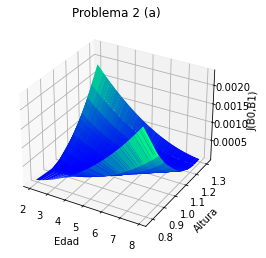

In [6]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Problema 2 (a)');
ax.set_xlabel('Edad')
ax.set_ylabel('Altura')
ax.set_zlabel('J(B0,B1)')

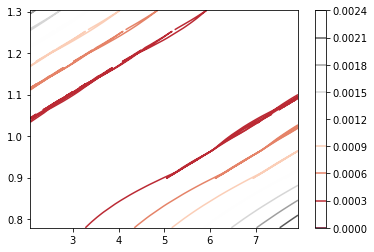

In [7]:
#De aquí sacamos la gráfica de contorno con los mismo datos
plt.contour(X, Y, Z, cmap='RdGy')
plt.colorbar();

<div class="alert alert-danger">
(b) Para poder hacer este, igual vamos a tener que sacar todos los valores de z y agruparlos en un mismo array. Para sacar Z=J(B0,B1) ocuparemos la función del Problema 1:
$$\frac{1}{2n}\sum_{i=1}^{n}(y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$
que codearemos utilizando un for que vaya de 1-50 (0-49)
</div>  

In [8]:
#Generamos una lista z donde guardaremos los valores respectivos por cada i de 1-50 (en código de 0-49)
z=[]
for i in range(50):
    v=(1/(2*50))*((ay[i]-0.73300235-(0.06700325*ex[i]))**2)
    z.append(v)
Z=np.array(z)
Z

array([8.50700050e-05, 5.89233862e-06, 4.81105060e-08, 5.43533941e-08,
       1.23833416e-05, 2.22103744e-05, 1.31578128e-05, 4.81356351e-06,
       5.55024538e-08, 2.60341111e-06, 3.31672898e-05, 2.24014294e-05,
       3.70404276e-06, 1.58905539e-07, 6.89244792e-05, 1.40863668e-05,
       3.77448193e-06, 7.56043420e-06, 5.22007113e-05, 1.63438867e-04,
       9.99536770e-07, 3.86258149e-06, 3.90941043e-05, 2.27416429e-05,
       2.66495422e-06, 3.27152441e-05, 1.45108395e-05, 2.20225194e-06,
       6.55520890e-06, 3.99153516e-05, 4.32218692e-06, 6.01678533e-09,
       1.24064833e-06, 2.57651982e-05, 6.15740627e-06, 1.66598659e-05,
       5.30195159e-06, 1.73990727e-05, 8.94929354e-06, 5.04027221e-06,
       4.59583030e-05, 6.39274854e-05, 3.61880044e-07, 1.60754916e-05,
       2.69975464e-06, 3.85409989e-05, 3.86267497e-05, 2.41838249e-05,
       7.36237802e-08, 6.64878753e-07])

<div class="alert alert-info">
El ultimo punto generado en la gráfica de abajo es valor de  𝐉(𝛽)  en la última iteración.
</div>

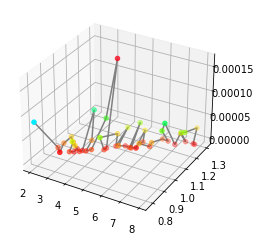

In [9]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = Z
x_line = ex
y_line = ay
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = Z
x_points = ex
y_points = ay
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

In [10]:
#Lo siento profe, intenté los interact en 3d un buen y no salían :c

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [11]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

<div class="alert alert-info">
(a) Le cambié el número de iteraciones porque no me salía la convergencia, entonces pensé ... a más iteraciones, más exactitud y jaló xd. La alpha de igualmanera la cambie, dado que con la que tenía, surguían errores a la hora de hacer la operación con el gradiente, como divisiones entre cero,etc. 
</div>

In [12]:
data3=np.loadtxt('data/chirps.txt')
#generamos listas con los datos x e y y las convertimos en arreglos
csx=np.array([i[0] for i in data3])
cty=np.array([i[1] for i in data3])
#APLICAMOS LA FUNCIÓN DE REGRESION LINEAL DE LA CLASE
CRL = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
CRL.gradientDescent(csx, cty)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


<div class="alert alert-danger">
Utilicé la función pra plotear de la clase, solo cambiando los títulos. Tambien vemos en que iteracion se dio la convergencia y lo insertamos como parámetro, al igual que la regresión lineal.
</div>

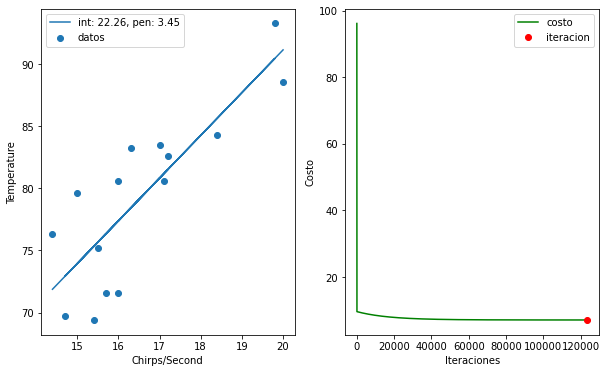

In [13]:
#Función de ploteo de la clase :3
def plotModelo3(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Chirps/Second')
    ax[0].set_ylabel('Temperature')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

plotModelo3(csx,cty, CRL, 123658)

<div class="alert alert-info">
Como se puede ver en la página web, la ecuación de regresión lineal es:  
    $$ y=3.4x\ +\ 22.85$$
y yo obtve un resultado de
    $$ \beta_0=22.26350136,\ \beta_1=3.44531603 $$
Es decir, sí coinciden los resultados al igual que la gráfica
    
</div>


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

<div class="alert alert-danger">
Se copió y pego los datos de la tabla en un txt, el cual abrimos y creamos 4 arreglos distintos para guardar las respectivas x´s y y´s (primero en listas y despues se convirtieron en arreglos). Esto se va explicando en el código.
</div>

In [14]:
#Creamos listas de listas vacías (variables x y y de cada respectivo tipo de dato)
I=[[],[]]
II=[[],[]]
III=[[],[]]
IV=[[],[]]
txt = open("Cuarteto de Anscombe.txt", "r")
#Lectura del txt con los datos por línea y se agrupan
for línea in txt:
#Se separan los datos por el caracter '	' y se gaurdan en variables distintas (sabemos el orden de los datos por la tabla en 
# wikipedia)
    x1,y1,x2,y2,x3,y3,x4,y4=línea.split("	")
    x1=float(x1)
    x2=float(x2)
    x3=float(x3)
    x4=float(x4)
    y1=float(y1)
    y2=float(y2)
    y3=float(y3)
    y4=float(y4)
#Se agregan a su respectiva lista
    I[0].append(x1)
    I[1].append(y1)
    II[0].append(x2)
    II[1].append(y2)
    III[0].append(x3)
    III[1].append(y3)
    IV[0].append(x4)
    IV[1].append(y4)
txt.close()
#Conversión a array
I2=np.array(I)
II2=np.array(II)
III2=np.array(III)
IV2=np.array(IV)

<div class="alert alert-danger">
Al igual que arriba, utilicé la función de regresión lineal cambiando los parametros alpha y max_iters
</div>

In [15]:
CA_I = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_I.gradientDescent(I2[0], I2[1])
CA_II = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_II.gradientDescent(II2[0], II2[1])
CA_III = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_III.gradientDescent(III2[0], III2[1])
CA_IV = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.0000001)
CA_IV.gradientDescent(IV2[0], IV2[1])

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292
La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293
La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294
La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


<div class="alert alert-info">
¡¡ ES IMPORTANTE NOTAR QUE LAS BETAS SON MUY SIMILARES !!
</div>

<div class="alert alert-danger">
Al igual que arriba se usó la funcion de ploteo de la clase pero la modifiqupe para solo ploteara la grafíca con la regresión lineal y asi poder mostrar las similitudes entre los CUARTETOS (las betas)
</div>

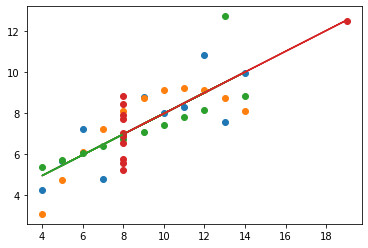

In [16]:
#Función de ploteo de la clase :3
def plotModelo4(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    _beta = rl.historia['beta'][iteracion]
    plt.scatter(x,y, label="datos")
    plt.plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))

#ploteo de la funcion en la iteración donde convergió
plotModelo4(I2[0],I2[1], CA_I, 12291)
plotModelo4(II2[0],II2[1], CA_II, 12291)
plotModelo4(III2[0],III2[1], CA_III, 12291)
plotModelo4(IV2[0],IV2[1], CA_IV, 12291)

<div class="alert alert-danger">
COMO PODEMOS NOTAR, EN EFECTO LA REGRESIÓN LINEAL EN CADA CASO ES IGUAL A LA DE LOS DEMÁS
</div>

## Problema 5

Use el archivo `radioactive_decay.dat`

In [17]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

<div class="alert alert-info">
Los datos tienen forma de función EXPONENCIAL
</div>

Text(0, 0.5, 'N_(remaining)')

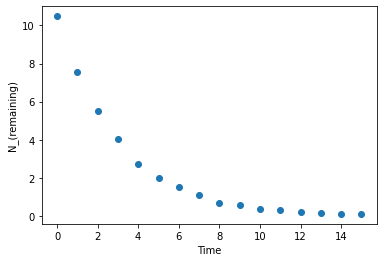

In [18]:
data5=np.loadtxt('data/radioactive_decay.txt')
#Abstraemos los N_remaining
rdY=np.array([i[1] for i in data5])
#Generamos el tiempo
rdX=np.array(range(16))
plt.scatter(rdX,rdY)
plt.xlabel('Time')
plt.ylabel('N_(remaining)')

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

<div class="alert alert-danger">
Aplicamos la función inversa (logarítimica) para obtener una relación lineal decreciente de los datos respecto al tiempo. Es decir, aplicamos log a cada valor y. No al tiempo porque xd ps eso ni al caso jaja. Así obtenemos una linealización de los datos
</div>

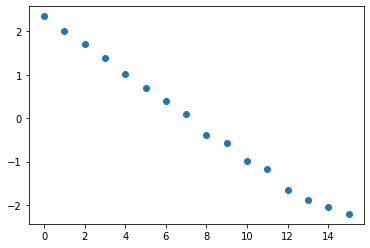

In [19]:
#Aplicamos la función inversa
rdYL=np.array([np.log(i) for i in rdY])
lines=list(zip(rdX,rdYL))
#Generamos un nuevo txt con los datos
with open('transform_radioactive_decay.txt', 'w') as f:
    for line in lines:
        f.write(str(line[0]))
        f.write("	")
        f.write(str(line[1]))
        f.write('\n')

plt.scatter(rdX,rdYL)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [20]:
txt5 = open("transform_radioactive_decay.txt", "r")
a=[]
b=[]
#para cada linea del archivo txt la partimos en 2 valores distintos que estaban separados por "	" y los guardamos en listas
#distintas
for línea in txt5:
    x,y=línea.split("	")
    a.append(float(x))
    b.append(float(y))
txt5.close()
#conversión a array
X5=np.array(a)
Y5=np.array(b)
#aplicamos la función de la clase
RD = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
RD.gradientDescent(X5, Y5)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


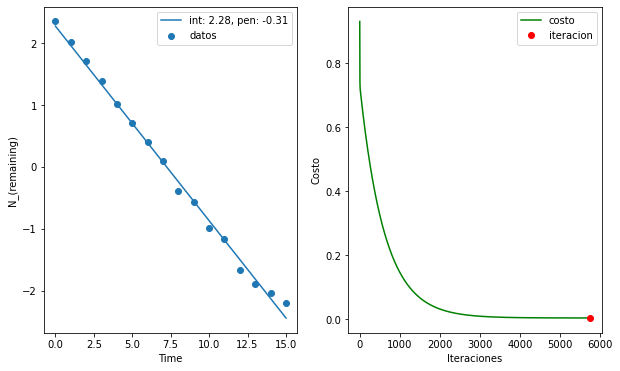

In [21]:
#Función de ploteo de la clase :3
def plotModelo5(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('N_(remaining)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

#ploteo de la funcion en la iteración donde convergió
plotModelo5(X5,Y5, RD, 5754)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

<div class="alert alert-info">
Sea según la clase B0=intersección y B1=pendiente, los valores B que mas ajustan es 
    $$ \beta_0=2.27548901\ ,\ \beta_1=-0.31459673 $$
</div>

In [22]:
RDT = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
RDT.gradientDescent(rdX,rdY)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


<div class="alert alert-info">
El espacio sin transformar sería el siguiente, que vemos que se separa bastante de la regresión lineal con los datos transformados
</div>

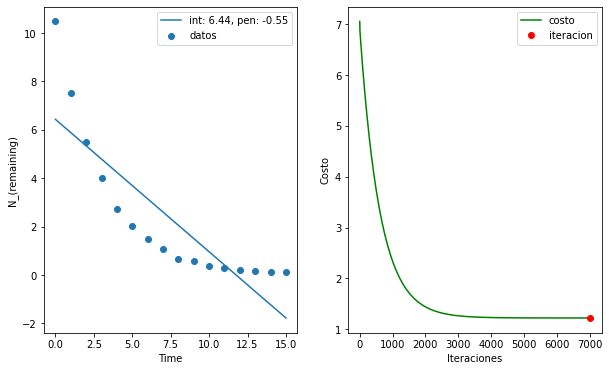

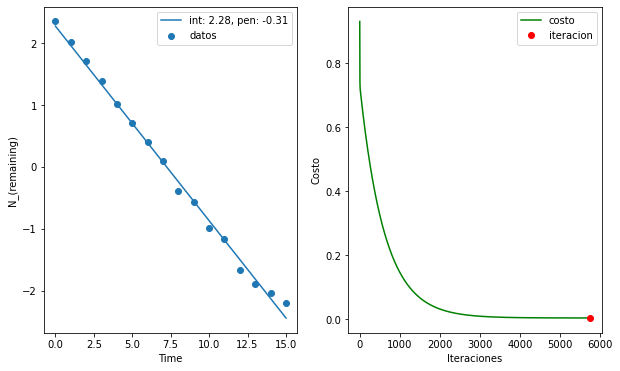

In [23]:
#Aplicamos los valores sin aplicar la linealización
plotModelo5(rdX,rdY, RDT, 7015)
plotModelo5(X5,Y5, RD, 5754)